In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
testsz = (11, 7)
testlines = '''p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3'''.splitlines()

In [3]:
datasz = (101, 103)
with open('day14input.txt') as fp:
    data = fp.read().splitlines()

## Part 1 ##

Coordinate system w/ periodic boundary conditions:
```
----> x
|
|
▼
y
```

In [4]:
def get_particles(lines):
    particles = []
    for line in lines:
        xypart, vxvypart = line.split(' ')[:2]
        x,y = xypart[2:].split(',')
        vx,vy = vxvypart[2:].split(',')
        particles.append((int(x), int(y), int(vx), int(vy)))
    return particles

In [5]:
def move(particle, time, xsize, ysize):
    x0, y0, vx, vy = particle
    x = (x0 + vx*time) % xsize
    y = (y0 + vy*time) % ysize
    return (x, y, vx, vy)

In [6]:
def moveall(particles, time, xsize, ysize):
    return [move(particle, time, xsize, ysize) for particle in particles]

In [7]:
def score(particles, xsize, ysize):
    xhalf, yhalf = xsize//2, ysize//2
    q1, q2, q3, q4 = 0, 0, 0, 0
    for particle in particles:
        x, y = particle[:2]
        if 0 <= x < xhalf:
            if 0 <= y < yhalf:
                q1 += 1
            elif y > yhalf:
                q3 += 1
        elif x > xhalf:
            if 0 <= y < yhalf:
                q2 += 1
            elif y > yhalf:
                q4 += 1
    return q1, q2, q3, q4, q1*q2*q3*q4

In [8]:
def part1(lines, size, time):
    particles = get_particles(lines)
    xsize, ysize = size
    #moved = []
    #for particle in particles:
        #moved.append(move(particle, time, xsize, ysize))
    moved = moveall(particles, time, xsize, ysize)
    q1, q2, q3, q4, product = score(moved, xsize, ysize)
    return product

In [9]:
assert(12 == part1(testlines, testsz, 100))

In [10]:
part1(data, datasz, 100)

221655456

## Part 2 ##

I'm guessing that when the particles form a tree, that will be when the most particles have neighboring grid points that are occupied.
So, let's just count the number of occupied neighboring grid points for each particle, and look for a max. Brute force, but it worked.

In [11]:
particles = get_particles(data)

In [12]:
len(particles)

500

In [13]:
def nbrscore(particles):
    score = 0
    positions = set(tuple(particle[:2]) for particle in particles)
    dirs = [(-1, -1), (-1, 0), (-1, +1), (0,-1), (0, +1), (+1, -1), (+1, 0), (+1, +1)]
    for particle in particles:
        x, y = particle[:2]
        for d in dirs:
            if (x+d[0], y+d[1]) in positions:
                score += 1
    return score
    

In [14]:
nbrscore(particles)

149

In [15]:
ts = list(range(0, 15000))

In [16]:
scores = [nbrscore(moveall(particles, t, datasz[0], datasz[1])) for t in ts]

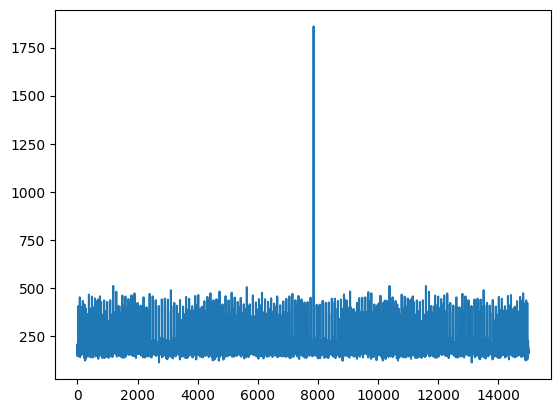

In [17]:
plt.plot(ts, scores, '-')

In [18]:
max(scores), scores.index(max(scores))

(1860, 7858)

In [19]:
tree = moveall(particles, 7858, datasz[0], datasz[1])

In [20]:
treepositions = set(tuple(particle[:2]) for particle in tree)

In [21]:
for y in range(datasz[1]):
    line = []
    for x in range(datasz[0]):
        if (x, y) in treepositions:
            line.append('#')
        else:
            line.append('.')
    print(''.join(line))

#........##..................#.......................................................................
.................................................................................................#...
.............................................#.......................................................
................#................##..................#....................#..........................
.......#.............................................................................................
........................................................................#............................
.....................................................................................................
.....................................................................................................
.........................................#...........................................................
..............#..............................................#....................